In [1]:
pip install nilearn


^C
Traceback (most recent call last):
  File "/home/rubycheng/miniconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/rubycheng/miniconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/rubycheng/miniconda3/lib/python3.10/site-packages/pip/__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "/home/rubycheng/miniconda3/lib/python3.10/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/rubycheng/miniconda3/lib/python3.10/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/rubycheng/miniconda3/lib/python3.10/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/home/ru

In [26]:
# from nilearn import datasets
# import numpy as np

# # Download the AAL atlas
# aal_atlas = datasets.fetch_atlas_aal(version='SPM12', verbose=1)

# # Access the atlas data and labels
# atlas_filename = aal_atlas.maps
# labels_filename = aal_atlas.labels

# # Load the atlas data and labels
# # Perform any further operations as needed
# # Load the labels
# labels = np.recfromcsv(labels_filename, delimiter='\t')

# # Print the labels
# print(labels)


[(b'Precentral_R',) (b'Frontal_Sup_L',) (b'Frontal_Sup_R',)
 (b'Frontal_Sup_Orb_L',) (b'Frontal_Sup_Orb_R',) (b'Frontal_Mid_L',)
 (b'Frontal_Mid_R',) (b'Frontal_Mid_Orb_L',) (b'Frontal_Mid_Orb_R',)
 (b'Frontal_Inf_Oper_L',) (b'Frontal_Inf_Oper_R',) (b'Frontal_Inf_Tri_L',)
 (b'Frontal_Inf_Tri_R',) (b'Frontal_Inf_Orb_L',) (b'Frontal_Inf_Orb_R',)
 (b'Rolandic_Oper_L',) (b'Rolandic_Oper_R',) (b'Supp_Motor_Area_L',)
 (b'Supp_Motor_Area_R',) (b'Olfactory_L',) (b'Olfactory_R',)
 (b'Frontal_Sup_Medial_L',) (b'Frontal_Sup_Medial_R',)
 (b'Frontal_Med_Orb_L',) (b'Frontal_Med_Orb_R',) (b'Rectus_L',)
 (b'Rectus_R',) (b'Insula_L',) (b'Insula_R',) (b'Cingulum_Ant_L',)
 (b'Cingulum_Ant_R',) (b'Cingulum_Mid_L',) (b'Cingulum_Mid_R',)
 (b'Cingulum_Post_L',) (b'Cingulum_Post_R',) (b'Hippocampus_L',)
 (b'Hippocampus_R',) (b'ParaHippocampal_L',) (b'ParaHippocampal_R',)
 (b'Amygdala_L',) (b'Amygdala_R',) (b'Calcarine_L',) (b'Calcarine_R',)
 (b'Cuneus_L',) (b'Cuneus_R',) (b'Lingual_L',) (b'Lingual_R',)
 (b'Oc

/home/rubycheng/miniconda3/lib/python3.10/site-packages/numpy/lib/npyio.py:2520: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


## Loading the data for only one person
For this tutorial, we will use the data provided by the `nilrean.datasets` module.

In [27]:
from nilearn import input_data, image

# Specify the file paths of the functional and labels (atlas) images
func_file = '/mnt/e/fmriprep/sub-002/func/sub-002_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
print(func_file)

# Load the functional image
func_img = image.load_img(func_file)


/mnt/e/fmriprep/sub-002/func/sub-002_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


In [28]:
# import glob
# from nilearn import input_data, image

# # Specify the base directory path where the files are located
# base_directory = '/mnt/e/fmriprep/'

# # Specify the pattern of the file names for the functional images
# func_pattern = 'sub-*'

# # Find all subdirectories that match the pattern
# sub_dirs = glob.glob(base_directory + func_pattern)

# # Extract the subject numbers from the subdirectory paths
# subject_numbers = [sub_dir.split('-')[1] for sub_dir in sub_dirs]

# # Loop over the subject numbers and process the files
# for subject in subject_numbers:
#     # Construct the file path using the subject number
#     func_file = base_directory + f'sub-{subject}/func/sub-{subject}_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
    
#     # Load the functional image
#     func_img = image.load_img(func_file)
    
#     # Process the image as needed
#     # ...

#     # Print the subject number and file path as an example
#     print(f"Subject: {subject}, File: {func_file}")


# Define ROIs using pain matrix
For pain matrix, I focus on six regions: the thalamus, insular cortex (IC), primary and secondary somatosensory cortices (SI and SII), anterior cingulate cortex (ACC), and prefrontal cortex (PFC) (Morton et al., 2016).

In [29]:
# %%
from nilearn import datasets
import numpy as np

# Download the AAL atlas
aal_atlas = datasets.fetch_atlas_aal(version='SPM12', verbose=1)
labels_filename = aal_atlas.labels

# %%
# The ROIs I'm interested will list here
roi_list = ["Thalamus", "Insula", "Cingulum_Ant", "Frontal_inf_Tri", "Precentral", "Postcentral"]

# Use regular expression to find corresponding ROI name and its indices in aal_atlas.maps
import re
re_pattern = "|".join(roi_list)

roi_names = []
roi_indices = []
for i, roi_name in enumerate(aal_atlas.labels):
    if re.search(re_pattern, roi_name):
        roi_names.append(roi_name)
        roi_indices.append(aal_atlas.indices[i])

        print(f"No.{i+1:03d} ROI, {roi_name}, has value of {aal_atlas.indices[i]} in aal_atlas.maps")
# %%
# create my own all_atlas.maps, this maps only include the ROIs that I'm interested
from nilearn import image
roi_masks = [ image.math_img(f"(img == {idx}) * {i+1}", img = aal_atlas.maps) for i, idx in enumerate(roi_indices) ]
selected_aal_maps = image.math_img(f"np.sum(img, axis = 3)", img = image.concat_imgs(roi_masks))

# %%
# Use this new maps to extract ROI signal and generate report about my ROIs
from nilearn import maskers
aal_masker = maskers.NiftiLabelsMasker(
    labels_img=selected_aal_maps, labels=["background"] + roi_names, 
    detrend=True, standardize=True, smoothing_fwhm=6.0, high_pass=0.01, low_pass=0.1, t_r=2.0)
aal_masker.fit()
aal_masker.generate_report()

No.001 ROI, Precentral_L, has value of 2001 in aal_atlas.maps
No.002 ROI, Precentral_R, has value of 2002 in aal_atlas.maps
No.029 ROI, Insula_L, has value of 3001 in aal_atlas.maps
No.030 ROI, Insula_R, has value of 3002 in aal_atlas.maps
No.031 ROI, Cingulum_Ant_L, has value of 4001 in aal_atlas.maps
No.032 ROI, Cingulum_Ant_R, has value of 4002 in aal_atlas.maps
No.057 ROI, Postcentral_L, has value of 6001 in aal_atlas.maps
No.058 ROI, Postcentral_R, has value of 6002 in aal_atlas.maps
No.077 ROI, Thalamus_L, has value of 7101 in aal_atlas.maps
No.078 ROI, Thalamus_R, has value of 7102 in aal_atlas.maps


/home/rubycheng/miniconda3/lib/python3.10/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/home/rubycheng/miniconda3/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:343: UserWarning: No image provided to fit in NiftiLabelsMasker. Plotting ROIs of label image on the MNI152Template for reporting.
  warnings.warn(msg)


label value,region name,size (in mm^3),relative size (in %)
1,Precentral_L,28208,15.25
2,Precentral_R,27048,14.62
3,Insula_L,14864,8.04
4,Insula_R,14160,7.66
5,Cingulum_Ant_L,11200,6.06
6,Cingulum_Ant_R,10504,5.68
7,Postcentral_L,31136,16.83
8,Postcentral_R,30584,16.54
9,Thalamus_L,8800,4.76
10,Thalamus_R,8456,4.57


## Masking the data

The masker not only removes the background voxels, but it can also regress out the confounds if you provide them.

In short, the confounds are external sources of signal you want to remove, such as the movement of the head. Regressing out the confounds means removing the part of the signal correlated to the sources of noise. For example we can remove the part of the signal that correlates with the head motion because we consider this part of signal to be artefacts caused by the movements and not relevant for brain activity. 

In [30]:
import pandas as pd

# Specify the path(s) of the confound file(s)
confound_files = '/mnt/e/fmriprep/sub-002/func/sub-002_task-rest_desc-confounds_timeseries.tsv'

# Specify the columns you want to select
selected_columns = ['dvars', 'framewise_displacement', 'trans_x','trans_y','trans_z', 'rot_x', 'rot_y', 'rot_z']  # Replace with the names of the columns you want to select

# Read the TSV file into a pandas DataFrame
df = pd.read_csv(confound_files, delimiter='\t')

# Select only the specified columns
selected_df = df[selected_columns]
selected_df.iloc[0]['dvars'] = 0
selected_df.iloc[0]['framewise_displacement'] = 0
# Now `selected_df` contains the DataFrame with only the selected columns
print(selected_df.head())  # Print the first few rows of the selected DataFrame


       dvars  framewise_displacement   trans_x   trans_y   trans_z     rot_x  \
0   0.000000                0.000000 -0.030209 -0.042646 -0.060922  0.000203   
1  27.229527                0.067177 -0.030247 -0.006518 -0.068794  0.000327   
2  23.595106                0.080535 -0.028200 -0.034991 -0.048727  0.000158   
3  29.169474                0.052365 -0.030210 -0.007842 -0.051131  0.000229   
4  28.552750                0.064280 -0.030240 -0.027970 -0.057058  0.000054   

      rot_y     rot_z  
0  0.000562  0.000526  
1  0.000224  0.000526  
2  0.000398  0.000271  
3  0.000625  0.000389  
4  0.000181  0.000244  


## To apply the atlas on our data

In [31]:
# Apply the masker to the functional image
time_series = aal_masker.fit_transform(func_img, confounds=selected_df)

# The resulting time series is a 2D array with shape (n_samples, n_regions)
print(time_series.shape)

(300, 10)


In [32]:
import matplotlib.pyplot as plt

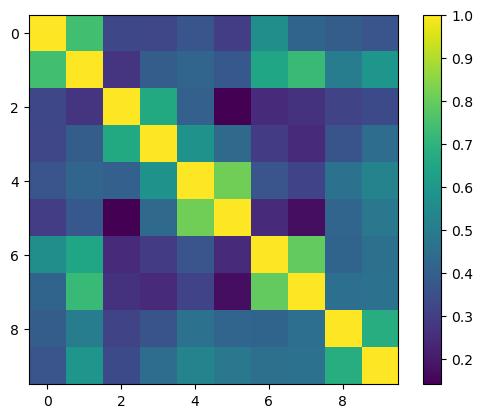

In [33]:
plt.imshow(np.corrcoef(time_series.transpose()))
plt.colorbar()

## Loading the data for the rest people

In [34]:
import glob
from nilearn import input_data, image

# Specify the base directory path where the files are located
base_directory = '/mnt/e/fmriprep/'

# Specify the pattern of the file names for the functional images
func_pattern = 'sub-*'

# Find all subdirectories that match the pattern
sub_dirs = glob.glob(base_directory + func_pattern)

# Extract the subject numbers from the subdirectory paths
subject_numbers = [sub_dir.split('-')[1] for sub_dir in sub_dirs]
# subject_numbers = subject_numbers[0:5]

# save to list
corr_mat = list()

# Loop over the subject numbers and process the files
for subject in subject_numbers:
    # Construct the file path using the subject number
    func_file = base_directory + f'sub-{subject}/func/sub-{subject}_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
    
    # Load the functional image
    func_img = image.load_img(func_file)
    
    # Process the image as needed
    import pandas as pd

    # Specify the path(s) of the confound file(s)
    confound_files = '/mnt/e/fmriprep/sub-002/func/sub-002_task-rest_desc-confounds_timeseries.tsv'

    # Specify the columns you want to select
    selected_columns = ['dvars', 'framewise_displacement', 'trans_x','trans_y','trans_z', 'rot_x', 'rot_y', 'rot_z']  # Replace with the names of the columns you want to select

    # Read the TSV file into a pandas DataFrame
    df = pd.read_csv(confound_files, delimiter='\t')

    # Select only the specified columns
    selected_df = df[selected_columns]
    selected_df.iloc[0]['dvars'] = 0
    selected_df.iloc[0]['framewise_displacement'] = 0
    
    time_series = aal_masker.fit_transform(func_img, confounds=selected_df)
    corr_mat.append(np.corrcoef(time_series.transpose()))

    # Save the correlation matrix to a file
    output_file = f'/mnt/e/fmriprep/subject-{subject}_correlation_matrix.npy'
    np.save(output_file, np.corrcoef(time_series))

    # Print the subject number and file path as an example
    print(f"Subject: {subject}, File: {func_file}")


Subject: 002, File: /mnt/e/fmriprep/sub-002/func/sub-002_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Subject: 004, File: /mnt/e/fmriprep/sub-004/func/sub-004_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Subject: 005, File: /mnt/e/fmriprep/sub-005/func/sub-005_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Subject: 006, File: /mnt/e/fmriprep/sub-006/func/sub-006_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Subject: 007, File: /mnt/e/fmriprep/sub-007/func/sub-007_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Subject: 008, File: /mnt/e/fmriprep/sub-008/func/sub-008_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Subject: 009, File: /mnt/e/fmriprep/sub-009/func/sub-009_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Subject: 010, File: /mnt/e/fmriprep/sub-010/func/sub-010_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Subject: 011, File: /mnt/e/fmriprep/sub-011/func/sub-011

## Create a matrix for each person

In [97]:
corr_mat_all = np.stack(corr_mat,axis = 2)
corr_mat_all.shape

(10, 10, 35)

calculate the correlation between ROIs (here we use Precentral_R & Insula_L as an example)

In [98]:
corr_mat_all[1, 2, :]

array([0.27262586, 0.73231846, 0.49606859, 0.76525812, 0.62317032,
       0.75796915, 0.58941322, 0.6023377 , 0.71625148, 0.81889843,
       0.87730909, 0.42605877, 0.75367119, 0.79999326, 0.44347349,
       0.71864386, 0.50421328, 0.43026616, 0.87398014, 0.57611732,
       0.56895772, 0.61254395, 0.77540731, 0.69244948, 0.59881069,
       0.53975671, 0.89302322, 0.74121474, 0.64729969, 0.68499283,
       0.67885936, 0.77510217, 0.70433858, 0.64580169, 0.68570756])

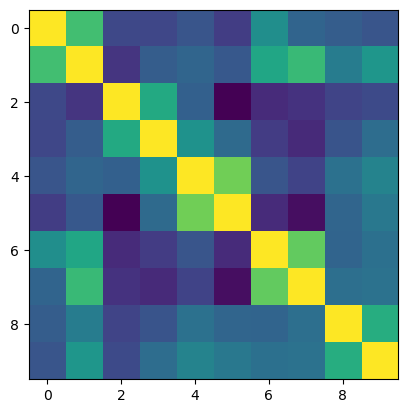

In [99]:
plt.imshow(corr_mat[0])

## Do correlations for each subject between ROIs

In [182]:
import numpy as np

# Iterate over each subject
for subject_index in range(corr_mat_all.shape[2]):
    # Get the correlation matrix for the current subject
    corr_matrix = corr_mat_all[:, :, subject_index]
    
    # Access the correlation values in the upper triangular portion
    for i in range(corr_matrix.shape[0]):
        for j in range(i+1, corr_matrix.shape[1]):
            correlation_value = corr_matrix[i, j]
            print(f"Subject {subject_index+1} - Correlation at ({i+1}, {j+1}): {correlation_value}")


Subject 1 - Correlation at (1, 2): 0.7407678019918771
Subject 1 - Correlation at (1, 3): 0.3283184923659654
Subject 1 - Correlation at (1, 4): 0.32488933141632964
Subject 1 - Correlation at (1, 5): 0.3665229167822933
Subject 1 - Correlation at (1, 6): 0.2971086195453446
Subject 1 - Correlation at (1, 7): 0.5669561706293381
Subject 1 - Correlation at (1, 8): 0.4187424259973282
Subject 1 - Correlation at (1, 9): 0.3959443246887936
Subject 1 - Correlation at (1, 10): 0.3690579028546621
Subject 1 - Correlation at (2, 3): 0.27262585676155265
Subject 1 - Correlation at (2, 4): 0.39329318897838267
Subject 1 - Correlation at (2, 5): 0.41986845111880694
Subject 1 - Correlation at (2, 6): 0.37769930055638956
Subject 1 - Correlation at (2, 7): 0.6508676264573068
Subject 1 - Correlation at (2, 8): 0.722257437937921
Subject 1 - Correlation at (2, 9): 0.5020269124094388
Subject 1 - Correlation at (2, 10): 0.5911681118316753
Subject 1 - Correlation at (3, 4): 0.664421072433684
Subject 1 - Correlation

In [183]:
# Create an empty list to store correlation values
correlation_values = []

# Iterate over each subject
for subject_index in range(corr_mat_all.shape[2]):
    # Get the correlation matrix for the current subject
    corr_matrix = corr_mat_all[:, :, subject_index]
    
    # Create an empty list to store correlation values for the current subject
    subject_correlation_values = []
    
    # Access the correlation values in the matrix as needed
    for i in range(corr_matrix.shape[0]):
        for j in range(corr_matrix.shape[1]):
            correlation_value = corr_matrix[i, j]
            
            # Append the correlation value to the subject's list
            subject_correlation_values.append(correlation_value)
    
    # Append the subject's list of correlation values to the overall list
    correlation_values.append(subject_correlation_values)

# Convert the list of lists to a NumPy array
correlation_values = np.array(correlation_values)

# Print the correlation values array
print(correlation_values)


[[ 1.          0.7407678   0.32831849 ...  0.46383848  0.67657595
   1.        ]
 [ 1.          0.79827154  0.626555   ...  0.6453559   0.87584455
   1.        ]
 [ 1.          0.96808875  0.55438476 ...  0.42504087  0.94534218
   1.        ]
 ...
 [ 1.          0.89504574  0.7830195  ...  0.62236698  0.95742578
   1.        ]
 [ 1.          0.95830156  0.69969643 ... -0.03164472  0.9354166
   1.        ]
 [ 1.          0.87058341  0.60535235 ...  0.70240646  0.86765553
   1.        ]]


## Define the group of each subject.

In [184]:
import pandas as pd

# Specify the path(s) of the confound file(s)
group_files = '/mnt/e/fmriprep/Clinical_fm_66.csv'

# Specify the columns you want to select
selected_columns2 = ['rid', 'gp']  # Replace with the names of the columns you want to select

# Read the TSV file into a pandas DataFrame
df2 = pd.read_csv(group_files, delimiter=',')

# Select only the specified columns
selected_df2 = df2[selected_columns2]
# Now `selected_df` contains the DataFrame with only the selected columns
print(selected_df2.head())  # Print the first few rows of the selected DataFrame


   rid  gp
0    2   0
1    4   0
2    5   0
3    6   0
4    7   1


In [185]:
import numpy as np

# Convert 'gp' column values into group array
group = np.where(selected_df2['gp'] == 0, 'FM', 'HC')

# Print the group array
print(group)


['FM' 'FM' 'FM' 'FM' 'HC' 'FM' 'FM' 'FM' 'FM' 'HC' 'FM' 'HC' 'FM' 'HC'
 'FM' 'HC' 'FM' 'FM' 'HC' 'HC' 'FM' 'FM' 'FM' 'HC' 'FM' 'FM' 'HC' 'HC'
 'HC' 'HC' 'HC' 'HC' 'FM' 'FM' 'FM']


In [186]:
import numpy as np

# Convert 'gp' column values into group array
group = np.where(selected_df2['gp'] == 0, 0, 1)

print(group)

# # Create FM array from group array
# FM = np.array(group == 1)

# # Print the FM array
# print(FM)


[0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0]


There are 21 patients (FM) and 14 healthy controls (HC).

In [192]:
corr_mat_FM = corr_mat_all[:, :, group == 0]
corr_mat_FM.shape


(10, 10, 21)

In [193]:
corr_mat_HC = corr_mat_all[:, :, group == 1]
corr_mat_HC.shape

(10, 10, 14)

In [194]:
from scipy.stats import ttest_ind

In [215]:
tstats, pval = ttest_ind(corr_mat_FM, corr_mat_HC, axis = 2)

/tmp/ipykernel_275/1939813480.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstats, pval = ttest_ind(corr_mat_FM, corr_mat_HC, axis = 2)


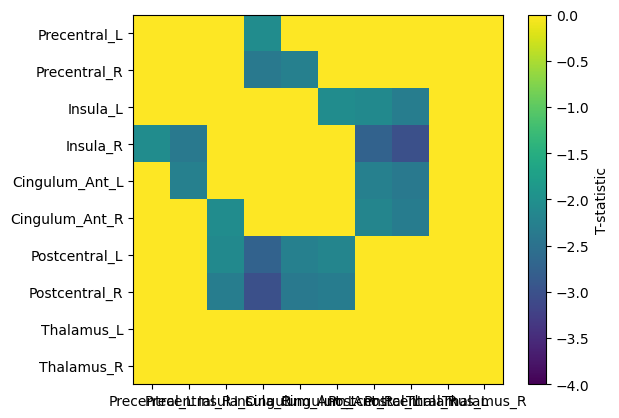

In [218]:
masked_tstats = tstats
masked_tstats[pval>0.05] = 0
plt.imshow(masked_tstats, vmin = -4) #use vmin to masked not values
plt.xticks(range(len(roi_names)), roi_names)
plt.yticks(range(len(roi_names)), roi_names)
# Add color bar
cbar = plt.colorbar()
cbar.set_label('T-statistic')
plt.show()